In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use("ggplot")
%matplotlib inline

In [2]:
HData = pd.read_csv('dataset.csv')

In [3]:
print(HData.keys())

Index(['var0', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var55', 'var56',
       'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64',
       'var65', 'var66', 'var67', 'var68', 'var69', 'var70', 'var71', 'var72',
       'var73', 'var74', 'var75', 'var76', 'var77', 'var78', 'var79', 'var80'],
      dtype='object')


In [4]:
HData.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.780088,NaN,NaN,NaN,0.803526,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.561473,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.817810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.734438,0.918015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
X= HData.drop('var80', axis =1).values
y = HData['var80'].values
y=y.reshape(-1,1)

In [6]:
X.shape

(1012, 80)

In [7]:
y.shape

(1012, 1)

In [8]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imp.fit(X)
X=imp.transform(X)

In [9]:
dX=pd.DataFrame(X)  
dX.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.541918,0.353806,0.731267,0.469247,0.428085,0.761168,0.316544,0.443298,0.375918,0.626712,...,0.845575,0.504025,0.780088,0.824518,0.494588,0.69771,0.803526,0.416034,0.50489,0.474636
1,0.541918,0.353806,0.731267,0.469247,0.428085,0.761168,0.316544,0.443298,0.375918,0.626712,...,0.955945,0.504025,0.791666,0.824518,0.494588,0.69771,0.561473,0.416034,0.50489,0.474636
2,0.541918,0.353806,0.731267,0.469247,0.428085,0.761168,0.316544,0.443298,0.375918,0.626712,...,0.845575,0.504025,0.817810,0.824518,0.494588,0.69771,0.605281,0.416034,0.50489,0.474636
3,0.541918,0.353806,0.731267,0.469247,0.428085,0.761168,0.316544,0.443298,0.375918,0.626712,...,0.990744,0.504025,0.734438,0.918015,0.494588,0.69771,0.605281,0.416034,0.50489,0.474636
4,0.541918,0.353806,0.731267,0.469247,0.428085,0.761168,0.316544,0.443298,0.375918,0.626712,...,0.845575,0.504025,0.791666,0.824518,0.494588,0.69771,0.605281,0.416034,0.50489,0.474636


In [ ]:
# How to preserve the column names after imputing mean values in place of missing values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 21, stratify = y)

In [11]:
knn = KNeighborsClassifier(n_neighbors=8)

In [12]:
knn.fit(X_train, y_train)

C:\Users\mant\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test)

In [14]:
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1]


In [15]:
knn.score(X_test, y_test)

0.8024691358024691

In [16]:
print(confusion_matrix(y_test, y_pred))

[[ 99  63]
 [ 17 226]]


In [17]:
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
TN, FP, FN, TP = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
print("TP {}, FN {}, FP {}, TN {} ".format(TN, FP, FN, TP))
print("accuracy : ", (TP+TN)/(TP+TN+FP+FN))

[[226  17]
 [ 63  99]]
TP 226, FN 17, FP 63, TN 99 
accuracy :  0.8024691358024691


In [18]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.61      0.71       162
          1       0.78      0.93      0.85       243

avg / total       0.81      0.80      0.79       405



In [19]:
y_pred_knn_prob = knn.predict_proba(X_test)
print(y_pred_knn_prob[0:10])
y_pred[0:10]

[[0.    1.   ]
 [0.    1.   ]
 [0.75  0.25 ]
 [0.375 0.625]
 [0.375 0.625]
 [0.875 0.125]
 [0.625 0.375]
 [0.125 0.875]
 [0.125 0.875]
 [0.75  0.25 ]]


array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [20]:
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, y_pred_knn_prob[:,1])

In [21]:
print(knn_fpr)
print(knn_tpr)
print(knn_thresholds)
type(knn_tpr)

[0.         0.0617284  0.16666667 0.25308642 0.38888889 0.47530864
 0.54320988 0.70987654 0.82098765 1.        ]
[0.         0.6872428  0.82716049 0.90534979 0.93004115 0.97119342
 0.98353909 1.         1.         1.        ]
[2.    1.    0.875 0.75  0.625 0.5   0.375 0.25  0.125 0.   ]


numpy.ndarray

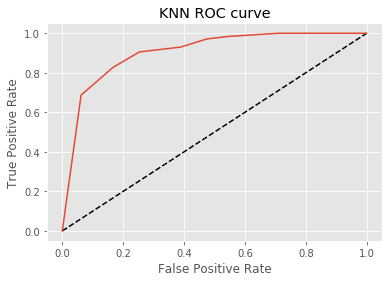

In [22]:
plt.plot([0,1], [0,1], "k--")
plt.plot(knn_fpr, knn_tpr, label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC curve");

In [23]:
auc_score_knn = roc_auc_score(y_test, y_pred_knn_prob[:,1])
print("auc score knn : ", auc_score_knn)

auc score knn :  0.9040923639689072
